Generating Content Interactions chart...


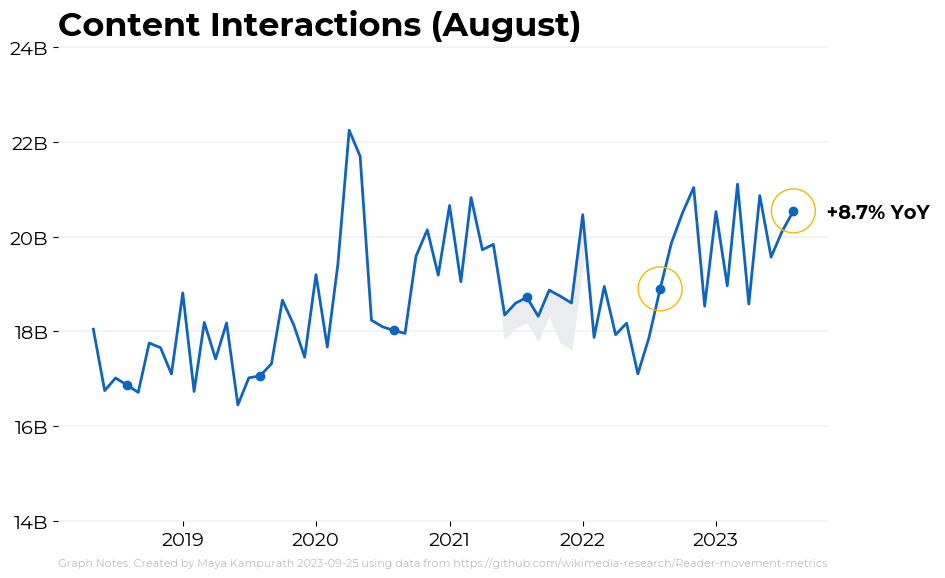

In [1]:
import pandas as pd
from datetime import date, datetime, timedelta
import os
from os.path import dirname
#local
#from wikicharts import Wikichart, wmf_colors
#jupyter notebook
%run wikicharts.ipynb

def main():
    print("Generating Content Interactions chart...")

    #---PARAMETERS---
    save_file_name = "Content_Interactions.png"
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')
 
    corrected_df = pd.read_csv(home_dir + '/resources/data/corrected_metrics_only.csv', sep=',')
    start_date = "2018-05-01"
    end_date = datetime.today()
    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])
    #set new index
    corrected_df.set_index('month')
    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    #combine datasets — add corrected values to the reader metrics dataset
    df['interactions_corrected'] = df['interactions']
    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df.loc[corrected_df['month'] ==  m]
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values

    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot()
    chart.plot_data_loss('month','interactions','interactions_corrected',corrected_df)
    chart.plot_line('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_yoy_highlight('month','interactions_corrected')
    chart.format(title = f'Content Interactions',
        radjust=0.87,
        data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
    chart.annotate(x='month',
        y='interactions_corrected',
        num_annotation=chart.calc_yoy(y='interactions_corrected'))
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()